In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# --- Configuration ---
# Set styles for our plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# --- Load Data ---
# Make sure you've downloaded the file and it's in the same folder as this notebook
# The file from Kaggle is 'myntra202305041052.csv'.
try:
    df = pd.read_csv("myntra202305041052.csv")
except FileNotFoundError:
    print("Error: Dataset file not found. Make sure 'myntra202305041052.csv' is in the correct folder.")
    # As a fallback, let's try a more generic name
    try:
        df = pd.read_csv("myntra_products.csv")
    except FileNotFoundError:
        print("Please check the file name and path.")
        
print("Dataset loaded successfully.")

Dataset loaded successfully.


In [2]:
# --- Initial Inspection ---

# Let's rename columns for clarity and to match our plan
df.rename(columns={
    'seller': 'brand',
    'name': 'product_name',
    'price': 'discounted_price',
    'mrp': 'original_price',
    'rating': 'avg_rating',
    'ratingTotal': 'rating_count'
}, inplace=True)

# See the first 5 rows
print("--- First 5 Rows (df.head()) ---")
display(df.head())

# Get column data types and null counts
print("\n--- Data Info (df.info()) ---")
df.info()

# Get statistical summary (for numbers)
print("\n--- Numerical Summary (df.describe()) ---")
display(df.describe())

# Get summary for all columns (including text)
print("\n--- Full Summary (df.describe(include='all')) ---")
display(df.describe(include='all'))

--- First 5 Rows (df.head()) ---


,id,product_name,img,asin,discounted_price,original_price,avg_rating,rating_count,discount,brand,purl
0,1,Men Solid Oversized Cotton,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,532.0,1299.0,4.1,5300,59,Difference of Opinion,https://www.myntra.com/tshirts/difference-of-o...
1,2,Men Cotton Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,274.0,499.0,4.2,25400,45,Roadster,https://www.myntra.com/tshirts/roadster/roadst...
2,3,Women Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,551.0,1199.0,4.5,3400,54,DILLINGER,https://www.myntra.com/tshirts/dillinger/dilli...
3,4,Typography Print T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,296.0,1099.0,4.0,18400,73,Huetrap,https://www.myntra.com/tshirts/huetrap/huetrap...
4,5,Printed Round Neck Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,494.0,899.0,4.2,3800,45,Roadster,https://www.myntra.com/tshirts/roadster/roadst...



--- Data Info (df.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060213 entries, 0 to 1060212
Data columns (total 11 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   id                1060213 non-null  int64  
 1   product_name      1060213 non-null  object 
 2   img               1060213 non-null  object 
 3   asin              1060213 non-null  object 
 4   discounted_price  1060213 non-null  float64
 5   original_price    1060213 non-null  float64
 6   avg_rating        1060213 non-null  float64
 7   rating_count      1060213 non-null  int64  
 8   discount          1060213 non-null  int64  
 9   brand             1060213 non-null  object 
 10  purl              1060213 non-null  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 89.0+ MB

--- Numerical Summary (df.describe()) ---


,id,discounted_price,original_price,avg_rating,rating_count,discount
count,1.060213e+06,1.060213e+06,1.060213e+06,1.060213e+06,1.060213e+06,1.060213e+06
mean,5.301070e+05,1.536235e+03,2.668379e+03,1.060150e+00,4.189618e+01,1.496420e+02
std,3.060573e+05,3.051140e+03,3.877900e+03,1.829632e+00,7.476645e+02,5.648781e+02
min,1.000000e+00,2.500000e+01,2.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.650540e+05,4.990000e+02,9.990000e+02,0.000000e+00,0.000000e+00,1.500000e+01
50%,5.301070e+05,8.110000e+02,1.780000e+03,0.000000e+00,0.000000e+00,5.000000e+01
75%,7.951600e+05,1.497000e+03,2.999000e+03,2.800000e+00,3.000000e+00,6.800000e+01
max,1.060213e+06,2.575000e+05,2.575000e+05,5.000000e+00,7.640000e+04,1.999600e+04



--- Full Summary (df.describe(include='all')) ---


,id,product_name,img,asin,discounted_price,original_price,avg_rating,rating_count,discount,brand,purl
count,1.060213e+06,1060213,1060213,1060213,1.060213e+06,1.060213e+06,1.060213e+06,1.060213e+06,1.060213e+06,1060213,1060213
unique,NaN,217738,691037,1,NaN,NaN,NaN,NaN,NaN,5496,823254
top,NaN,Men Polo Collar T-shirt,-,-,NaN,NaN,NaN,NaN,NaN,Roadster,https://www.myntra.com/perfume-and-body-mist/c...
freq,NaN,5644,192879,1060213,NaN,NaN,NaN,NaN,NaN,10651,8
mean,5.301070e+05,NaN,NaN,NaN,1.536235e+03,2.668379e+03,1.060150e+00,4.189618e+01,1.496420e+02,NaN,NaN
std,3.060573e+05,NaN,NaN,NaN,3.051140e+03,3.877900e+03,1.829632e+00,7.476645e+02,5.648781e+02,NaN,NaN
min,1.000000e+00,NaN,NaN,NaN,2.500000e+01,2.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN
25%,2.650540e+05,NaN,NaN,NaN,4.990000e+02,9.990000e+02,0.000000e+00,0.000000e+00,1.500000e+01,NaN,NaN
50%,5.301070e+05,NaN,NaN,NaN,8.110000e+02,1.780000e+03,0.000000e+00,0.000000e+00,5.000000e+01,NaN,NaN
75%,7.951600e+05,NaN,NaN,NaN,1.497000e+03,2.999000e+03,2.800000e+00,3.000000e+00,6.800000e+01,NaN,NaN


In [3]:
# --- 1. Handle Nulls ---
print("--- Missing Values (Before) ---")
print(df.isnull().sum())

# Strategy:
# For ratings, missing might mean "not rated". We'll fill with 0.
df['avg_rating'].fillna(0, inplace=True)
df['rating_count'].fillna(0, inplace=True)

# For brand, we can fill with 'Unbranded'
df['brand'].fillna('Unbranded', inplace=True)

# For prices, nulls are problematic. Let's drop rows where key info is missing.
df.dropna(subset=['product_name', 'discounted_price', 'original_price'], inplace=True)

print("\n--- Missing Values (After) ---")
print(df.isnull().sum())

--- Missing Values (Before) ---
id                  0
product_name        0
img                 0
asin                0
discounted_price    0
original_price      0
avg_rating          0
rating_count        0
discount            0
brand               0
purl                0
dtype: int64


C:\Users\S PRITAM\AppData\Local\Temp\ipykernel_19228\4205618199.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['avg_rating'].fillna(0, inplace=True)
C:\Users\S PRITAM\AppData\Local\Temp\ipykernel_19228\4205618199.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp


--- Missing Values (After) ---
id                  0
product_name        0
img                 0
asin                0
discounted_price    0
original_price      0
avg_rating          0
rating_count        0
discount            0
brand               0
purl                0
dtype: int64


In [4]:
# --- 2. Convert Columns & Clean Text ---
# Our key numeric columns are already floats, but if they weren't, you'd use:
# df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')

# Clean text fields (lowercase and strip whitespace)
df['product_name'] = df['product_name'].astype(str).str.lower().str.strip()
df['brand'] = df['brand'].astype(str).str.lower().str.strip()

In [5]:
# --- 3. Feature Engineering ---

# A. Calculate Discount Percentage
# We need to handle cases where original_price is 0 to avoid dividing by zero
df['discount_percent'] = 0.0
mask = df['original_price'] > 0
df.loc[mask, 'discount_percent'] = ((df['original_price'] - df['discounted_price']) / df['original_price']) * 100

# B. Create Price Categories
# We'll use quantiles to define price bins (low, medium, high)
df['price_category'] = pd.qcut(df['discounted_price'], 3, labels=['low', 'medium', 'high'])

print("\n--- Data with New Features (df.head()) ---")
display(df[['product_name', 'original_price', 'discounted_price', 'discount_percent', 'price_category']].head())


--- Data with New Features (df.head()) ---


,product_name,original_price,discounted_price,discount_percent,price_category
0,men solid oversized cotton,1299.0,532.0,59.045420,low
1,men cotton pure cotton t-shirt,499.0,274.0,45.090180,low
2,women pure cotton t-shirt,1199.0,551.0,54.045038,low
3,typography print t-shirt,1099.0,296.0,73.066424,low
4,printed round neck pure cotton t-shirt,899.0,494.0,45.050056,low


--- Top 10 Brands ---
brand
roadster                 10651
h&m                       6667
puma                      6579
max                       6486
anouk                     6158
kalini                    5793
jc collection             5631
hrx by hrithik roshan     5575
friskers                  5240
marks & spencer           5113
Name: count, dtype: int64


C:\Users\S PRITAM\AppData\Local\Temp\ipykernel_19228\198272665.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_brands.values, y=top_10_brands.index, palette="viridis")


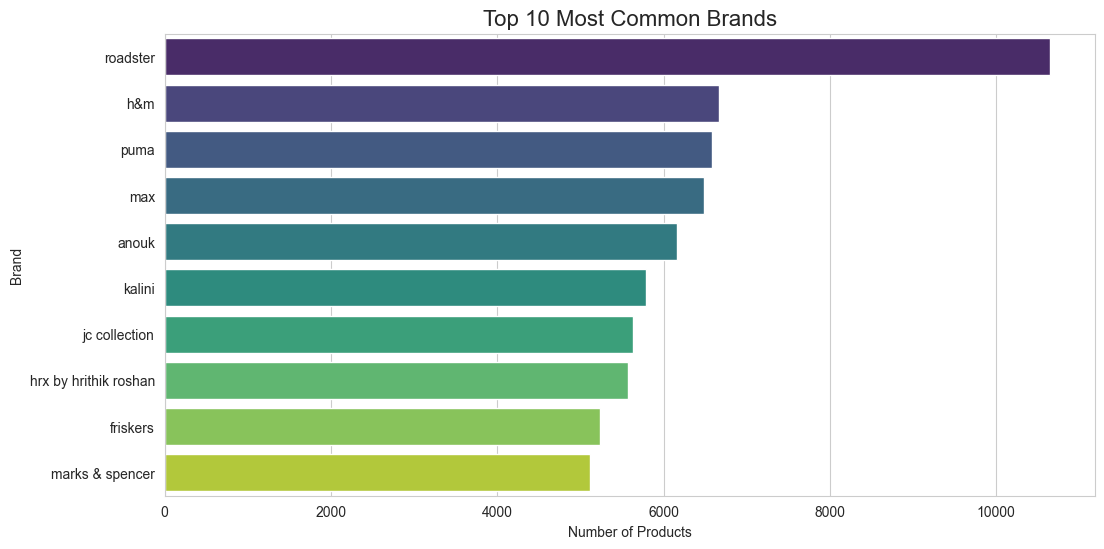

In [6]:
# --- Top Brands ---
top_10_brands = df['brand'].value_counts().head(10)
print("--- Top 10 Brands ---")
print(top_10_brands)

# Plot: Top 10 Brands
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_brands.values, y=top_10_brands.index, palette="viridis")
plt.title('Top 10 Most Common Brands', fontsize=16)
plt.xlabel('Number of Products')
plt.ylabel('Brand')
plt.show()

--- Top 10 Inferred Categories (from product name) ---
inferred_category
men            202064
women          143932
set             50939
printed         45908
boys            41230
pack            34966
unisex          32509
gold-plated     23862
solid           19023
floral          17389
Name: count, dtype: int64


C:\Users\S PRITAM\AppData\Local\Temp\ipykernel_19228\894882141.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_categories.values, y=top_10_categories.index, palette="plasma")


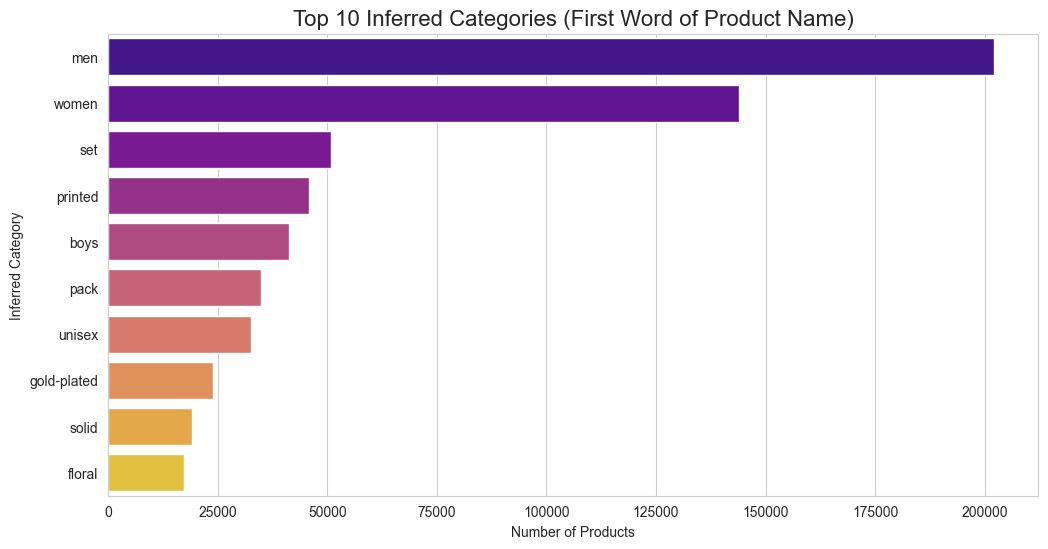

In [7]:
# --- Category / Gender Breakdown ---
# This dataset doesn't have 'category' or 'gender' columns.
# We can *infer* them from the 'product_name' as a proxy.

# Let's see the most common *first words* in product names
df['inferred_category'] = df['product_name'].str.split().str[0]
top_10_categories = df['inferred_category'].value_counts().head(10)

print("--- Top 10 Inferred Categories (from product name) ---")
print(top_10_categories)

# Plot: Top 10 Inferred Categories
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_categories.values, y=top_10_categories.index, palette="plasma")
plt.title('Top 10 Inferred Categories (First Word of Product Name)', fontsize=16)
plt.xlabel('Number of Products')
plt.ylabel('Inferred Category')
plt.show()

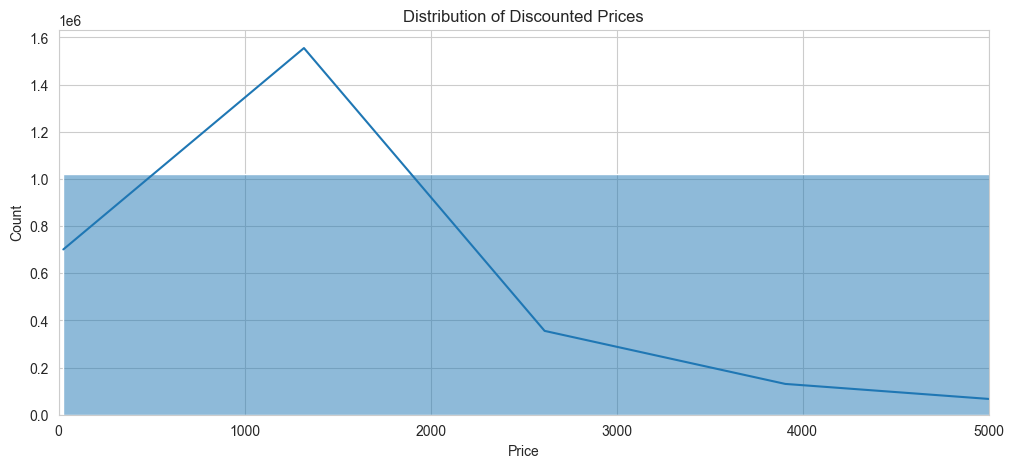

In [8]:
# --- Price Distribution ---
plt.figure(figsize=(12, 5))
sns.histplot(df['discounted_price'], bins=50, kde=True)
plt.title('Distribution of Discounted Prices')
plt.xlabel('Price')
plt.xlim(0, 5000) # Zoom in on the most common price range
plt.show()

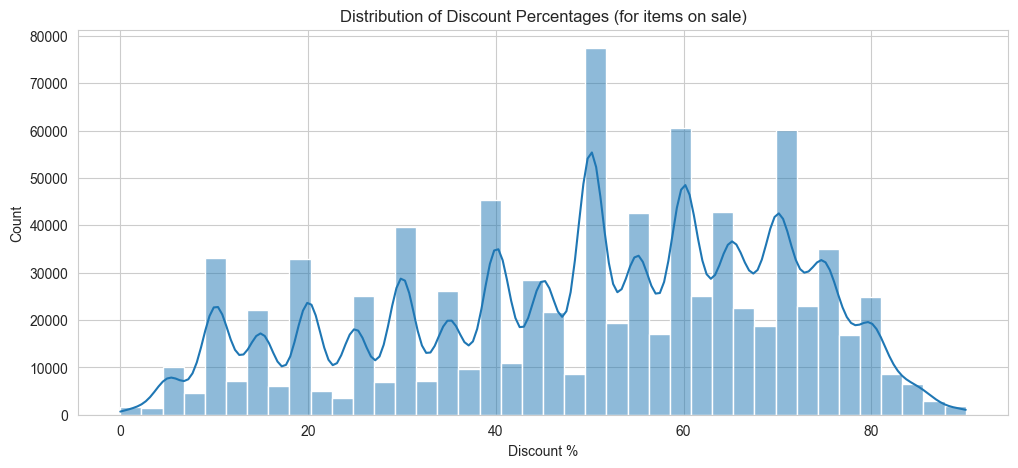

In [9]:
# --- Discount Distribution ---
plt.figure(figsize=(12, 5))
sns.histplot(df[df['discount_percent'] > 0]['discount_percent'], bins=40, kde=True)
plt.title('Distribution of Discount Percentages (for items on sale)')
plt.xlabel('Discount %')
plt.show()

--- Average Discount % for Top 10 Brands ---
brand
kalini                   69.353504
anouk                    63.771402
roadster                 53.192729
friskers                 50.228736
hrx by hrithik roshan    49.483721
puma                     37.880824
jc collection            33.185873
marks & spencer          22.184400
h&m                       6.538100
max                       1.202160
Name: discount_percent, dtype: float64


C:\Users\S PRITAM\AppData\Local\Temp\ipykernel_19228\616851795.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_discount_by_brand.values, y=avg_discount_by_brand.index, palette="coolwarm")


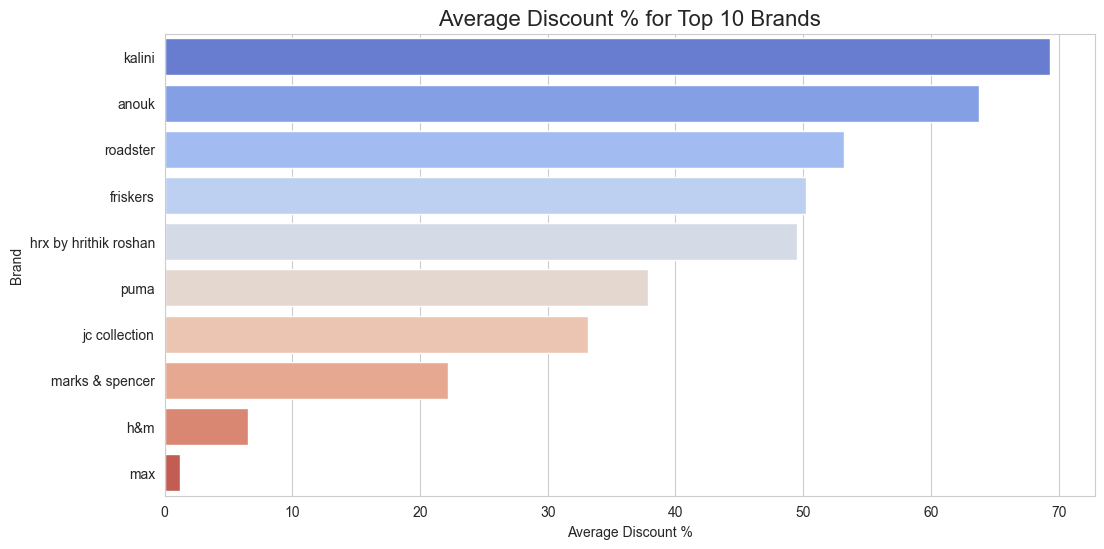

In [10]:
# --- Average Discount by Top Brand ---
top_brands_list = top_10_brands.index
avg_discount_by_brand = df[df['brand'].isin(top_brands_list)].groupby('brand')['discount_percent'].mean().sort_values(ascending=False)

print("--- Average Discount % for Top 10 Brands ---")
print(avg_discount_by_brand)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_discount_by_brand.values, y=avg_discount_by_brand.index, palette="coolwarm")
plt.title('Average Discount % for Top 10 Brands', fontsize=16)
plt.xlabel('Average Discount %')
plt.ylabel('Brand')
plt.show()

In [11]:
# --- Most Popular Products (by rating_count) ---
# Filter out unrated products
rated_products = df[df['rating_count'] > 0]

most_popular = rated_products.sort_values(by='rating_count', ascending=False)
print("--- Top 10 Most Popular Products (by number of ratings) ---")
display(most_popular[['product_name', 'brand', 'rating_count', 'avg_rating']].head(10))

--- Top 10 Most Popular Products (by number of ratings) ---


,product_name,brand,rating_count,avg_rating
375328,toner-lotion-cream-lip balm,biotique,76400,4.4
271611,toner-lotion-cream-lip balm,biotique,76400,4.4
950168,men pack of 2 printed t-shirt,hrx by hrithik roshan,75100,4.2
254775,unisex skin care gift set,biotique,72700,4.4
353233,unisex skin care gift set,biotique,72700,4.4
950167,pack of 2 printed t-shirts,hrx by hrithik roshan,72600,4.2
989446,pack of 2 printed t-shirts,hrx by hrithik roshan,72600,4.2
990061,pack of 2 printed pure cotton t-shirt,hrx by hrithik roshan,72500,4.2
88090,toner-sunscreen-lotion-cream,biotique,72400,4.4
232773,sustainable skin & hair care,biotique,71300,4.4


In [12]:
# --- Best Rated Brands (by avg_rating) ---
# Let's only consider brands with a decent number of products (e.g., > 100)
brands_to_analyze = df['brand'].value_counts()[df['brand'].value_counts() > 100].index
best_brands = df[df['brand'].isin(brands_to_analyze)].groupby('brand')['avg_rating'].mean().sort_values(ascending=False)

print("\n--- Top 10 Best Rated Brands (with > 100 products) ---")
print(best_brands.head(10))


--- Top 10 Best Rated Brands (with > 100 products) ---
brand
neutrogena           4.436000
dove                 4.420408
forest essentials    4.396559
lotus herbals        4.381622
dot & key            4.290074
bioderma             4.288350
fogg                 4.246154
loreal               4.220000
maybelline           4.213057
khadi natural        4.211677
Name: avg_rating, dtype: float64


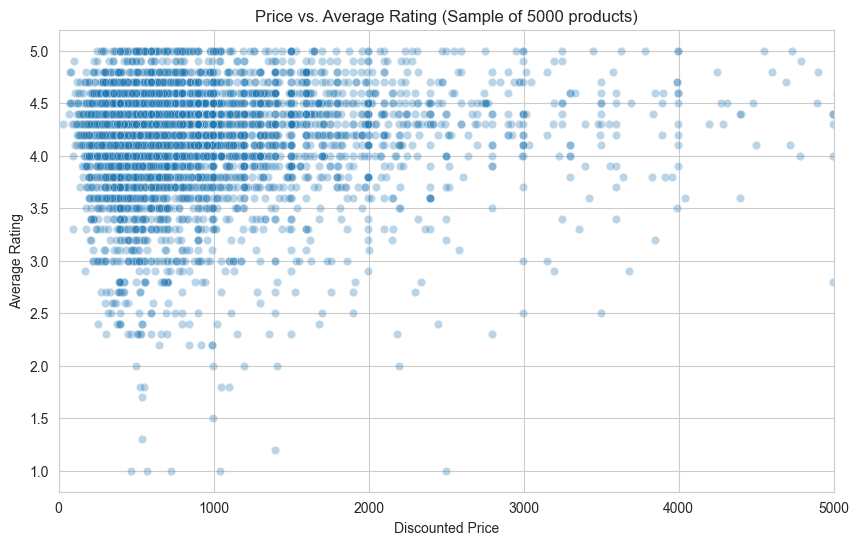

In [13]:
# --- Correlation: Does higher price mean better rating? ---
# We'll use a sample to avoid overplotting
df_sample = rated_products.sample(5000, random_state=42)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_sample, x='discounted_price', y='avg_rating', alpha=0.3)
plt.title('Price vs. Average Rating (Sample of 5000 products)')
plt.xlabel('Discounted Price')
plt.ylabel('Average Rating')
plt.xlim(0, 5000) # Zoom in
plt.show()

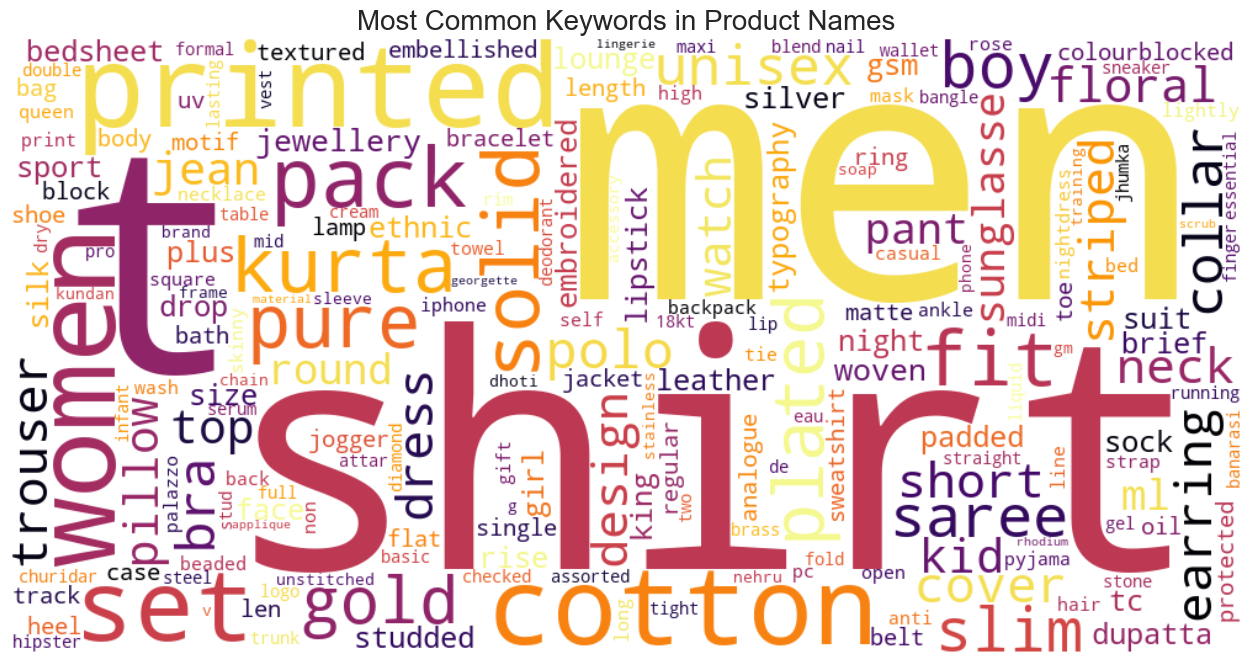

In [14]:
# --- WordCloud from Product Names ---
# This helps us see the most common terms (like "cotton", "slim fit", "printed")
text = " ".join(name for name in df.product_name)

# Create the word cloud
wordcloud = WordCloud(
    background_color="white",
    width=1000,
    height=500,
    colormap='inferno',
    collocations=False # Avoids "slim fit" being one word
).generate(text)

# Display the image
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Keywords in Product Names", fontsize=20)
plt.show()

In [ ]:
# --- Save the Final, Cleaned DataFrame ---
# We'll drop the 'inferred_category' as it was just for exploration
df_cleaned = df.drop(columns=['inferred_category'])

df_cleaned.to_csv("myntra_cleaned_data.csv", index=False)

print("Cleaned data saved to 'myntra_cleaned_data.csv'")